# Load raster data via WCS and xarray

In [1]:
from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          708aa8af-7a35-457f-8627-c32d6465bb6d

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "dataset": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

8df9b0e6-e4b4-586e-90a3-6cf0f08c4e62

## Query raster via WCS

In [5]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_xarray(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=[360. / 16, 180. / 16],
        )
)

data

<xarray.DataArray (band: 1, y: 16, x: 16)>
array([[[255, 255, ..., 255, 255],
        [255, 255, ..., 255, 255],
        ...,
        [255, 255, ..., 255, 255],
        [255, 255, ..., 255, 255]]], dtype=uint8)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 84.38 73.12 61.88 50.62 ... -50.62 -61.88 -73.12 -84.38
  * x        (x) float64 -168.8 -146.2 -123.8 -101.2 ... 101.2 123.8 146.2 168.8
Attributes:
    transform:      (22.5, 0.0, -180.0, 0.0, -11.25, 90.0)
    crs:            +init=epsg:4326
    res:            (22.5, 11.25)
    is_tiled:       1
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

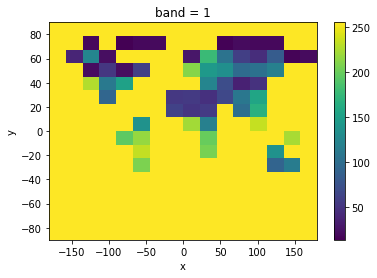

In [6]:
data.plot()